In [3]:
%matplotlib inline

In [2]:
from scipy.stats import norm
from scipy.stats import normaltest
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn

# Normal Distribution: What is it, why we need it and how to find if it's there

## Course project by Dimitar Atanasov

### Math For Developers, February 2021

## Table of Contents:

### Preface

### 1. What is Normal Distribution?

### 2. Why do we need to know what normal distribution is?

### 3. Assuming Normality: A Staple of Modern Science

### 4. A Mathematical look at Normal Distribution

### 5. Checking whether a distribution is Normal

#### 5.1 The Various Methods Of Testing

##### 5.1.1 D'Agustino's K^2 Test (D'Agustino-Pearson Omnibus)

##### 5.1.2 Shapiro-Wilk Test

### 6. Interpreting the tests

### 7. Conclusion

# Preface

I chose this topic, as it is interesting, both in theory, but also in practice. I have experience in processing data with IBM's SPSS, as well as Excel.
After all, I am a PhD student in Sociology, and have several years of experience. I have studied Statistics in University a fair amount. I do not consider myself an expert by any means, as my interests lie more in the field of STS (Science and Technology Studies), where we make a different kind of observations.
Regardless, the optimization potential here appears astounding, and the way it works is much cleaner, visible and transparent than it is in SPSS.
As such, I decided to look into what Gaussian distribution entails, and into some ways to check if whether it is there or not. If possible, I would like to scratch the surface on some brand-new theories claiming that normal distribution isn't actually real when considering today's massive data samples that come out of big data analyses.

# 1. What is Normal Distribution?
**Prior to starting, this is only a theoretical point, that explains the concept, the mathematics of it come a tad bit later.**

The Normal distribution is also referred to as the Gaussian Distribution. This is not by accident, but rather because Carl Friedrich Gauss was the first to observe it and note it.
The Gaussian distribution is a continuous probability distribution that could be considered central and quite important in many fields of science.
It is called the bell curve, because the graph of its probability density looks like a bell.
**Generally speaking, for a normal distribution the following is fact:**

* The mean, mode and median are all equal.
* The curve is symmetric at the center (i.e. around the mean, μ).
* Exactly half of the values are to the left of center and exactly half the values are to the right.
* The total area under the curve is 1.

To provide a better idea of what normal distribution looks like, the following graph is presented below:
![It appears my image is gone](XifLyoH.jpg) An example of Gaussian distribution.

A method of figuring out how data are distributed is to plot them in a graph. 
If the data is evenly distributed, you may come up with a bell curve - obviously this is simply a visual check and more tests are required to be certain. 
A bell curve has a small percentage of the points on both tails and the bigger percentage on the inner part of the curve. 
In the standard normal model, about 5 percent of your data would fall into the “tails” (colored darker orange in the image below) and 90 percent will be in between. 

An example of this are test scores (of high school, university and so on, students), the normal distribution would show 2.5 percent of students getting very low scores and 2.5 percent getting very high scores. The rest will be in the middle; not too high or too low. The shape of the standard normal distribution looks like the graph above.

### The Central Limit Theorem

Many values follow a normal distribution. This is because of the central limit theorem, which says that if an event is the sum of identical but random events, it will be normally distributed. Some examples include:

* Height
* Test scores
* Measurement errors
* Light intensity (so-called Gaussian beams, as in laser light)
* Intelligence is probably normally distributed. There is a problem with accurately defining or measuring it, though.
* Insurance companies use normal distributions to model certain average cases.

The central limit theorem is the basis for how normal distributions work in statistics.

In research, to get a good idea of a population mean, ideally you’d collect data from multiple random samples within the population. A sampling distribution of the mean is the distribution of the means of these different samples.

The central limit theorem shows the following:

* Law of Large Numbers: As you increase sample size (or the number of samples), then the sample mean will approach the population mean.
* With multiple large samples, the sampling distribution of the mean is normally distributed, even if your original variable is not normally distributed.

**In the social sciences, in which I am also a PhD student and have experience in, assumptions on whether data is normally distributied is frequently used in our research and surveys.**

If one is, say, a high school student and wants to get a rough idea of his level. A simple survey and check the normal distribution is there, could help them figure out which subject they are getting good grades in and which subjects they have to exert more effort into due to low scoring percentages. Once they get a score in one subject that is higher than their own score in another subject, they might think considering that they are better in the subject where they got the higher score. Of course, as there is always a statistical chance for an error - this is not always true.

**To put it in even simpler terms: A normal distribution is a distribution that is solely dependent on two parameters of the data set: mean and the standard deviation of the sample.**
1. Mean — This is the average value of all the points in the sample that is computed by summing the values and then dividing by the total number of the values in a sample.
2. Standard Deviation — This indicates how much the data set deviates from the mean of the sample.
**The normal distribution is simple to explain. The reasons are:**
1. The mean, mode, and median of the distribution are equal.
2. A researcher only needs to use the mean and standard deviation to explain the entire distribution.

# 2. Why do we need to know what normal distribution is?

Normal distributions are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. The Normal distribution is a continuous theoretical probability distribution. In this article, I am going to explore the Normal distribution using Jupyter Notebook.

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

As such, there are a range of techniques that researchers can use to check if their data sample deviates from a Gaussian distribution, called normality tests.
Researchers check if whether a sample is normal and that subsequently dictates the types of statistical methods to use with a data sample. They employ various graphical methods for qualifying deviations from normal, such as histograms and the Q-Q plot.

Essentially, researchers use statistical normality tests for quantifying deviations from normal. Subsequent decision-making then is applied to see what parametric or non-parametric methods are to be used.

## 3. Assuming Normality: A Staple of Modern Science

A large fraction of the field of statistics (and by proxy sociology, and other fields) is concerned with data that assumes that it was drawn from a Gaussian distribution.

If methods are used that assume a Gaussian distribution, and data was drawn from a different distribution, the findings may be misleading or plain wrong.

There are a number of techniques that can be employed to check if a data sample is Gaussian or sufficiently Gaussian-like to use the standard techniques, or sufficiently non-Gaussian to instead use non-parametric statistical methods.

This is a key decision point when it comes to choosing statistical methods for your data sample.
To put it as simple as possible:
* If there is a Gaussian distribution we use parametric statistical methods.
* If there is a deviation from Normality we use non-parametric statistical methods.

There is also some middle ground where we can assume that the data is Gaussian-enough to use parametric methods or that we can use data preparation techniques to transform the data to be sufficiently Gaussian to use the parametric methods.

A key point in statistics is that researchers don't get too attached to "normal distribution" and are willing to do anything in order to make it appear Gaussian.

The data may not be normal for lots of different reasons. Each test that we will see below investigates whether a sample was drawn from a Gaussian distribution from a slightly different perspective.

A failure of one normality test means that the data is not normal. As simple as that. As such is it valuable to use more than one normality test per sample.

Researchers can either investigate why data is not normal and perhaps use data preparation techniques to make the data more normal.

**Finally, researchers can face the music and look into the use of nonparametric statistical methods instead of the parametric methods.**


## 4. A Mathematical look at Normal distribution

For both theoretical and practical reasons, the normal distribution is probably the most important distribution in statistics. For example,
* Many classical statistical tests are based on the assumption that the data follow a normal distribution. This assumption should be tested before applying these tests.
* In modeling applications, such as linear and non-linear regression, the error term is often assumed to follow a normal distribution with fixed location and scale.
* The normal distribution is used to find significance levels in many hypothesis tests and confidence intervals.


The normal distribution is widely used. Part of the appeal is that it is well behaved and mathematically tractable. However, the central limit theorem provides a theoretical basis for why it has wide applicability.
The central limit theorem basically states that as the sample size (N) becomes large, the following occur:

The sampling distribution of the mean becomes approximately normal regardless of the distribution of the original variable.
The sampling distribution of the mean is centered at the population mean, μ, of the original variable. In addition, the standard deviation of the sampling distribution of the mean approaches $\sigma / \sqrt{N}$.

As we mentioned earlier, the most characteristic feature of normal distribution is its probability density, as it resembles a bell.
Its Probability Density Function (PDF) looks the following way:

$$f(x)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}\text{, where $x\in \mathbb{R}$}$$

$f(x)$ = probability

$x$ = value of the variable

$\mu$ = mean

$\sigma$ = standard deviation

$\sigma^2$ = variance


The standard normal distribution, also called the z-distribution, is a special normal distribution where the mean is 0 and the standard deviation is 1.

Every normal distribution is a version of the standard normal distribution that’s been stretched or squeezed and moved horizontally right or left.
While individual observations from normal distributions are referred to as x, they are referred to as z in the z-distribution. Every normal distribution can be converted to the standard normal distribution by turning the individual values into z-scores.

Z-scores tell you how many standard deviations away from the mean each value lies.

$$z=\frac{x-\mu}{\sigma}$$

Where:
$x$ = individual value

$\mu$ = mean

$\sigma$ = standard deviation

$\mu$ is the location parameter and $\sigma$ is the scale parameter. The case where $\mu$ = 0 and σ$\sigma$ = 1 is called the standard normal distribution. The equation for the standard normal distribution is
$$f(x) = \frac{e^{-x^{2}/2}} {\sqrt{2\pi}}$$

The random variable X described by the PDF is a normal variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$.

The Normal distribution notation is $$X\sim N(\mu,\sigma^2)$$

The area under the curve equals 1. $$\int \limits _{-\infty} ^{+\infty}f(x)dx=1$$
The standard normal probability function looks like this:
![Alt text](norpdf.gif)

In order to see how the Normal distribution plots with different means, and thus a different probability density function, we will use the norm.pdf function, as seen below.
norm.pdf retuns a single pdf value. Below is the pdf value when $x=1, \mu=0, \sigma=1$.

In [3]:
norm.pdf(x=1.0, loc=0, scale=1)

0.24197072451914337

We can see where the function is located on the normal distribution itself when we mark a plot with the specific function x position.

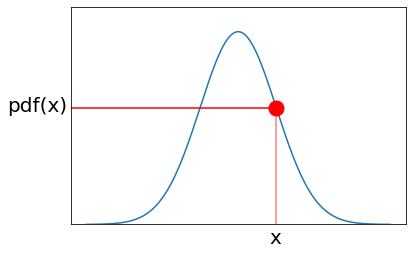

In [4]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45) # range
ax.axhline(y=0.24,xmax=0.61,color='r') # horizontal line
ax.axvline(x=1, ymax=0.53, color='r',alpha=0.5) # vertical line
xplot = ax.plot([1], [0.24], marker='o', markersize=15, color="red") # coordinate point
ax.set_yticks([]) # remove y axis label
ax.set_xticks([]) # remove x axis label
ax.set_xlabel('x',fontsize=20) # set x label
ax.set_ylabel('pdf(x)',fontsize=20,rotation=0) # set y label
ax.xaxis.set_label_coords(0.61, -0.02) # x label coordinate
ax.yaxis.set_label_coords(-0.1, 0.5) # y label coordinate
plt.show()

Since norm.pdf returns a PDF value, we can use this function to plot the normal distribution function. We graph a PDF of the normal distribution using scipy, numpy and matplotlib. We use the domain $−4<x<4$, range $0<f(x)<0.45$, default $\mu=0 and \sigma=1$. And then using our favourite function in this course: plot(x-values,y-values).

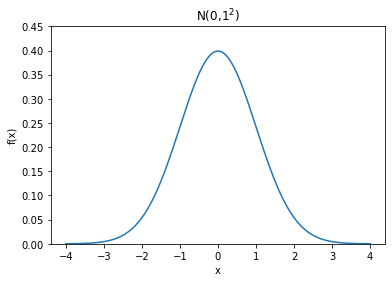

In [6]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)

plt.show()

Important here is that the bell curve is symmetrical - it has a maximum point at $x=\mu$.

A very simple way to see if normal distribution really occurs in random samples of data is to plot random values, and see if it works in the familiar bell curve.

Instead of using a generator, we use the norm.rvs function that simply generates random normal distribution numbers according to the scale which is the standard deviation, the loc which is the mean and the size. We create a histogram for the generated numbers and add the PDF on top of it.

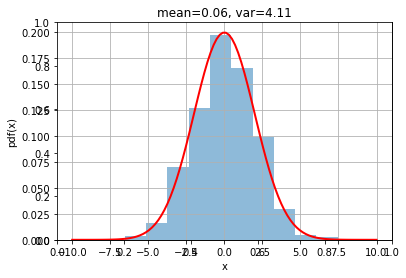

In [7]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = norm.pdf(x,scale=2)
v = np.var(xs)
m = np.mean(xs)

ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)

Lastly, for this course project, I will look at how researchers can calculate the probability of normal distribution.
If we assume that we have a mean equalling 3, and the standard deviation is 2, we can find the probability $P(X < 2)$. $$X \sim N(3,2^2)$$
Returning to the norm.pdf function here, the location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.
We come up with the code below:

The probability is 0.31, rounded up


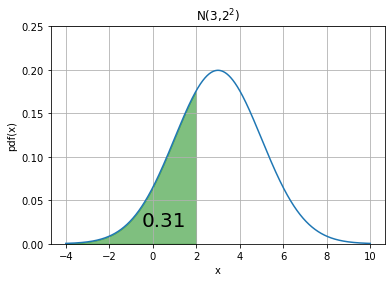

In [13]:
lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(f"The probability is {lessthan2:.2f}, rounded up")
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')

# for text
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

**I consider this to be a suitable amount of deliberation into normal distribution, without getting into the functions for cumulative normal distribution, intervals between variables and more.**

## 5. Checking whether a distribution is Normal

I mentioned several times in the previous sections why it is important to check whether a researcher's data normally distributed.

Still, to elaborate before moving forward:

Simple predictive models are usually the most used models. This is due to the fact that they can be explained and are well-understood. Now to add to this point; normal distribution is simple and hence its simplicity makes it extremely popular.

If researchers want to predict a variable accurately then the first task they need to perform is to understand the underlying behaviour of our target variable.
What they need to do first is to determine the possible outcomes of the target variable and if the underlying outcomes are discrete (distinct values) or continuous (infinite values). 

Once a researcher understands how the values are distributed then they can start estimating the probabilities of the events, even by the means of using formulas (known as probability distribution functions). As a consequence, they can start understanding the behaviour of their target variables better. The probability distribution is dependent on the moments of the sample such as mean, standard deviation, skewness, and/or kurtosis.

### 5.1 The Various Methods Of Testing

There are several methods of testing whether a distribution is normal. Due to the constraints of space and not to get too out of hand in explanations, I will look into two methods - the D’Agostino’s K^2 Test, as well as the Shapiro-Wilk test.
There are various other methods such as the Lilliefors corrected K-S test, Anderson-Darling test, Cramer-von Mises test, Anscombe-Glynn kurtosis test, and the Jarque-Bera test.

**There is no specific reason as to why exactly I chose these two to look into, apart from the fact that they were easily doable in SPSS in my past experience and I have some (potentially limited) knowledge of them.**

Before moving foward, the following needs to be mentioned:

The tests mentioned above compare the scores in the sample to a normally distributed set of scores with the same mean and standard deviation; the null hypothesis is that “sample distribution is normal.” If the test is significant, the distribution is non-normal. For small sample sizes, normality tests have little power to reject the null hypothesis and therefore small samples most often pass normality tests.

### Generating our Random Dataset

I will generate a small sample of random numbers drawn from a Gaussian distribution.

The choice of Gaussian random numbers for the test dataset means that we do expect each test to correctly identify the distribution, nevertheless, the small-ish sample size may introduce some noise into the results.

We will use the randn() NumPy function to generate random Gaussian numbers with a mean of 0 and a standard deviation of 1, so-called standard, normal variables. We will then shift them to have a mean of 50 and a standard deviation of 5.

The test is a bit rigged, obviously, as it is guaranteed that it will be Gaussian, but that is not the point here.

I will use the randn() NumPy function to generate random Gaussian numbers with a mean of 0 and a standard deviation of 1, so-called standard, normal variables. I will then shift them to have a mean of 50 and a standard deviation of 5.

In [10]:
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))

mean=50.303 stdv=4.426


Of course, we will also visually check it with a histogram.

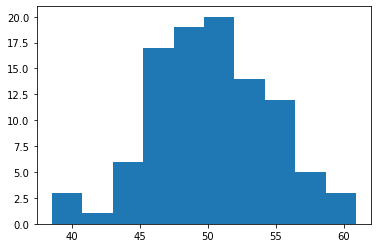

In [17]:
plt.hist(data)
plt.show()

It has a Gaussian-like shape to the data, that although is not strongly the familiar bell-shape, is a rough approximation. It will do the job!

### 5.1.1 D’Agostino’s K^2 Test

The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

**Skew** is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.

**Kurtosis** quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

**The D’Agostino’s K^2 test is luckily available via the normaltest() SciPy function and returns the test statistic and the p-value.**

Simply put, H0 means that the distribution is Gaussian, while H1 assumes that it is non-Gaussian. We use the test to check.

The test is based on transformations of the sample kurtosis and skewness, and has power only against the alternatives that the distribution is skewed and/or kurtic.

In the following, ${\{x_i\}}$ denotes a sample of n observations, $g_1$ and $g_2$ are the sample skewness and kurtosis, mj’s are the j-th sample central moments, and $\bar x$ is the sample mean.

The sample skewness and kurtosis are defined as:

\begin{array}{l}
g_{1}=\frac{m_{3}}{m_{2}^{3 / 2}}=\frac{\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{3}}{\left(\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right)^{3 / 2}} \\
g_{2}=\frac{m_{4}}{m_{2}^{2}}-3=\frac{\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{4}}{\left(\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right)^{2}}-3
\end{array}

These quantities consistently estimate the theoretical skewness and kurtosis of the distribution, respectively.

**Prior to any test, of course, we need to generate our data - since usually a random sample turns out to be normally distributed, we'll simply use a random number generator, luckily NumPy includes one.**

In [11]:
# seed the random number generator
# We can change the seed, we can do more tests, usually it comes out almost the same.
np.random.seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# We print out the Mean and Std to check if everything is in order and then we carry out the test.

print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian accept H0, reject H1')
else:
    print('Sample does not look Gaussian accept H1, reject H0')

mean=50.303 stdv=4.426
Statistics=0.102, p=0.950
Sample looks Gaussian accept H0, reject H1


Running the example calculates the statistic and prints the statistic and p-value.

The p-value is interpreted against an alpha of 5% and finds that the test dataset does not significantly deviate from normal.

It would also be unfair to simply call the test the D'Agostino K^2, as it is rather the D'Agostino-Pearson omnibus.
To explain what takes place in the code above - the test first computes the skewness and kurtosis to quantify how far from Gaussian the distribution is in terms of asymmetry and shape. 
It then calculates how far each of these values differs from the value expected with a Gaussian distribution, and computes a single P value from the sum of these discrepancies. 
It is a versatile and powerful normality test, and is recommended.

**A bit more on the test could be read in the scipy documentation on the following [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)**

### 5.1.2 Shapiro-Wilk Test

The Shapiro-Wilk test is based on the correlation between the data and the corresponding normal scores and provides better power than the K-S test even after the Lilliefors correction. Power is the most frequent measure of the value of a test for normality—the ability to detect whether a sample comes from a non-normal distribution. Some researchers recommend the Shapiro-Wilk test as the best choice for testing the normality of data.

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The [shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

In [20]:
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian accept H0, reject H1')
else:
    print('Sample does not look Gaussian accept H1, reject H0')

Statistics=0.992, p=0.822
Sample looks Gaussian accept H0, reject H1


I load up a new dataset each time in order to avoid forgetting it!

Running the example first calculates the test on the data sample, then prints the statistic and calculated p-value.

## 6. Interpreting the tests

Each of the tests we look at returns two things:

* Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
* p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

**There is no concrete guarantee that any distribution is Gaussian, as there is no concrete, 100% guarantee in any of the statistics I have ever come across in my experience - everytime there is a statistical error, and other variables. Sometimes the data is simply not enough, or wrongfully gathered, or wrongfully tested.**

## 7. Conclusion

"Normal" data are data that are drawn (come from) a population that has a normal distribution. This distribution is inarguably the most important and the most frequently used distribution in both the theory and application of statistics.
The simple term "normal" means something is easy to understand, easy to track, easy to prod and study.
As such, there is really little need in explaining why using it, whenever possible, is important.

The Gaussian distribution was attributed to the brilliant mathematician by mistake, but still researchers should take to properly use it and not apply it to data that's not normally distributed, due to wishful thinking, or through looking for a shortcut.

**And, instead of at the beginning, the anecdota comes in the end!**

The normal probability distribution was discovered by Abraham De Moivre in 1733 as a way of approximating the binomial probability distribution when the number of trials in a given experiment is very large. In 1774, Laplace studied the mathematical properties of the normal probability distribution. Through a historical error, the discovery of the normal distribution was attributed to Gauss who first referred to it in a paper in 1809. In the nineteenth century, many scientists noted that measurement errors in a given experiment followed a pattern (the normal curve of errors) that was closely approximated by this probability distribution.

#### References:

1. [Statisticshowto.com](https://www.statisticshowto.com/probability-and-statistics/normal-distributions/)
2. [Machinelearningmastery.com](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
3. Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486–489. https://doi.org/10.5812/ijem.3505
4. Mishra, P., Pandey, C. M., Singh, U., Gupta, A., Sahu, C., & Keshri, A. (2019). Descriptive statistics and normality tests for statistical data. Annals of cardiac anaesthesia, 22(1), 67–72. https://doi.org/10.4103/aca.ACA_157_18
5. [The Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/eda/eda.htm)
6. Oztuna D, Elhan AH, Tuccar E. Investigation of four different normality tests in terms of type 1 error rate and power under different distributions. Turkish Journal of Medical Sciences. 2006;36(3):171–6. [Google Scholar](https://scholar.google.com/scholar_lookup?journal=Turkish+Journal+of+Medical+Sciences.&title=Investigation+of+four+different+normality+tests+in+terms+of+type+1+error+rate+and+power+under+different+distributions.&author=D+Oztuna&author=AH+Elhan&author=E+Tuccar&volume=36&issue=3&publication_year=2006&pages=171-6&) [Ref list](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/#A3505R7)
7. https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm